# Clustering

## Import Libraries and Dataset

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [5]:
customer_info = pd.read_csv('segmentation data.csv')
customer_info

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


Sex: <br>
0: Male <br>
1: Female
<br>
<br>
Marital status: <br>
0: Single<br>
1: Non-single (divorced / separated / married / widowed)
<br>
<br>
Education: <br>
0: Other / unknown <br>
1: High school<br>
2: University<br>
3: Graduate school
<br>
<br>
Occupation: <br>
0: Unemployed / unskilled <br>
1: Skilled employee / official <br>
2: Management / self-employed / highly qualified employee / officer 
<br>
<br>
Settlement size: <br>
0: Small city <BR>
1: Mid-sized city <BR>
2: Big city

In [7]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [8]:
customer_info.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [9]:
customer_info = customer_info.drop(['ID'], axis=1)
customer_info

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [10]:
num_col = ['Age', 'Income']
cat_col = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

In [11]:
df = customer_info.copy()

Convert data types to strings for data visualization purposes

In [13]:
df[cat_col] = df[cat_col].astype('str')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              2000 non-null   object
 1   Marital status   2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Education        2000 non-null   object
 4   Income           2000 non-null   int64 
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


## Exploratory Data Analysis

### Numerical variable distribution

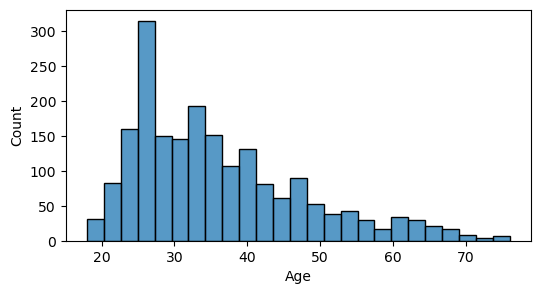

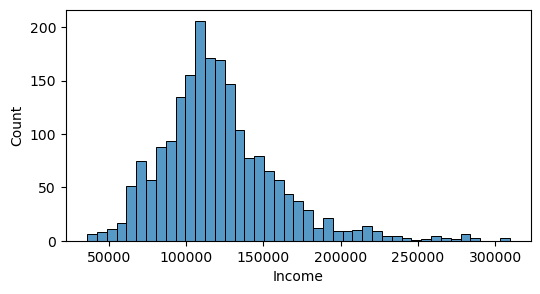

In [17]:
for num in num_col:
    plt.figure(figsize=(6,3))
    sns.histplot(data = customer_info, x = num)

### Categorical variable distribution

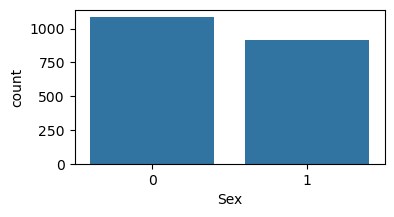

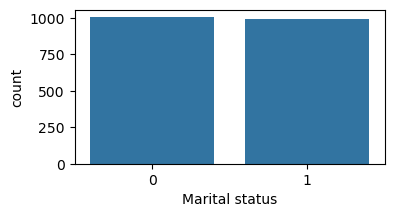

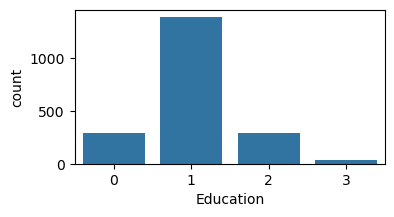

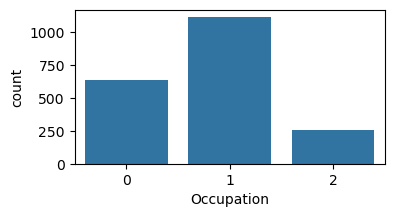

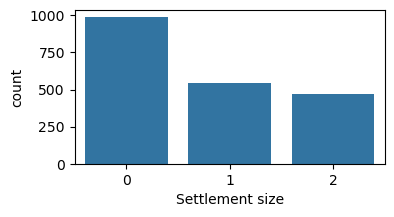

In [19]:
for cat in cat_col:
    plt.figure(figsize = (4, 2))
    sns.countplot(data = customer_info, x = cat)

### Bivariate analysis (between 2 variables)

#### Between numeric variables

<Axes: xlabel='Age', ylabel='Income'>

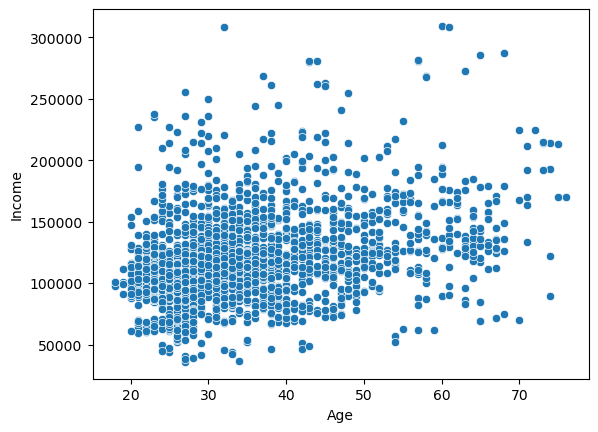

In [22]:
sns.scatterplot(x = 'Age', y = 'Income', data = customer_info)

Calculate the correlation between two numeric variables

In [24]:
stats.pearsonr(customer_info['Age'], customer_info['Income'])

PearsonRResult(statistic=0.34061016373173525, pvalue=1.6443825442386605e-55)

In [25]:
df['Age'].corr(df['Income'])

0.34061016373173514

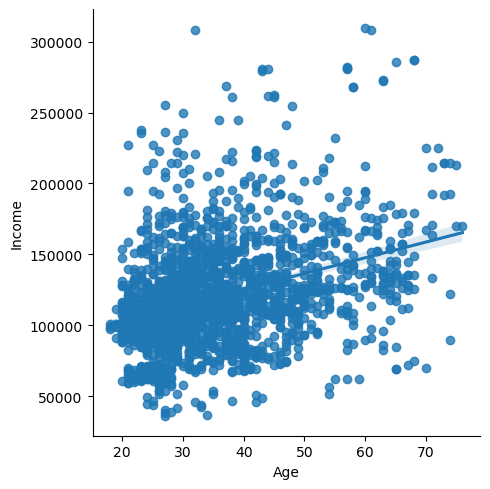

In [26]:
sns.lmplot(x = 'Age', y = 'Income', data = customer_info)

#### Between categorical and nominal columns

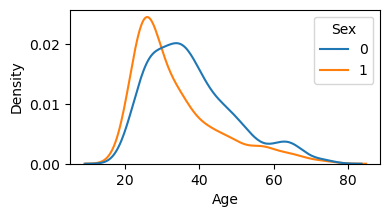

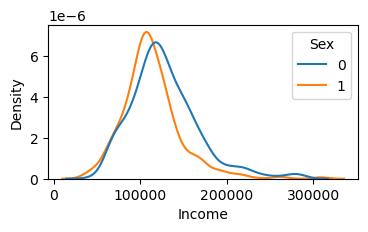

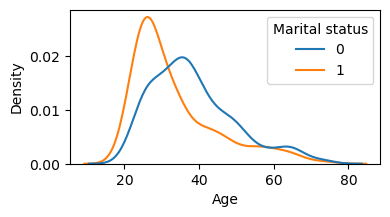

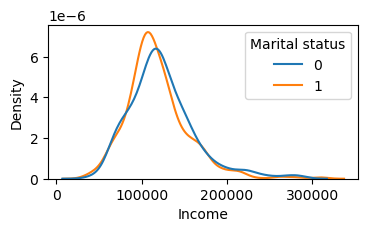

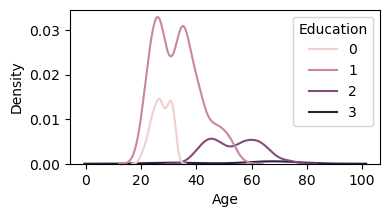

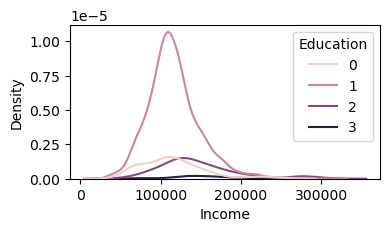

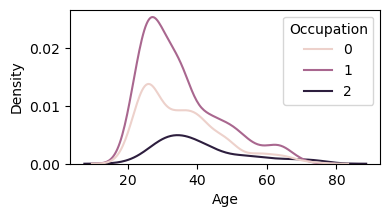

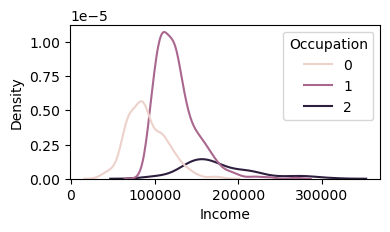

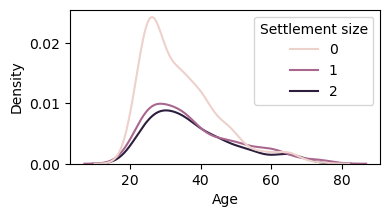

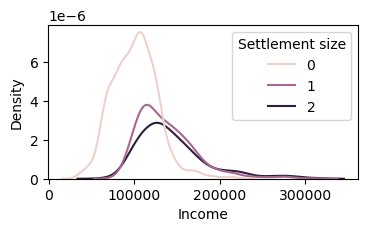

In [28]:
for cat in cat_col:
    for num in num_col:
        plt.figure(figsize = (4, 2))
        sns.kdeplot(data = customer_info, x = num, hue = cat)

#### Between categorical columns

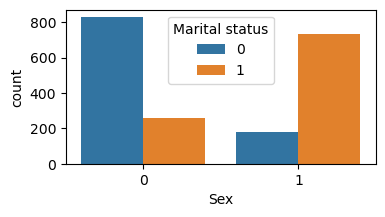

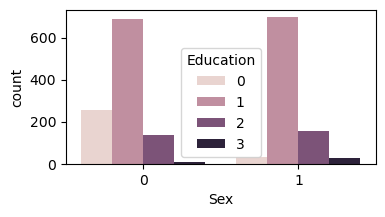

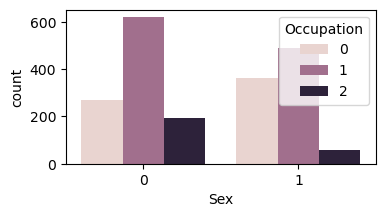

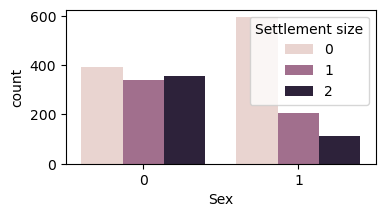

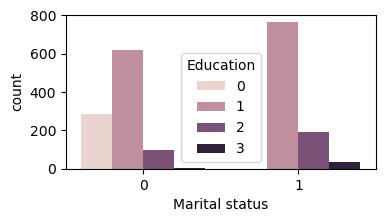

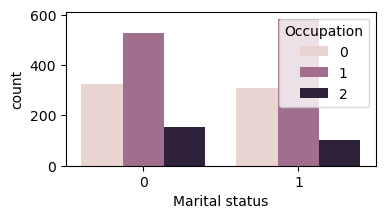

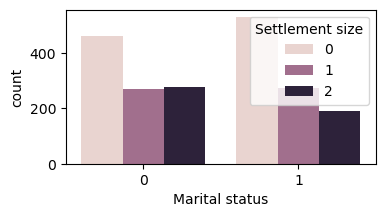

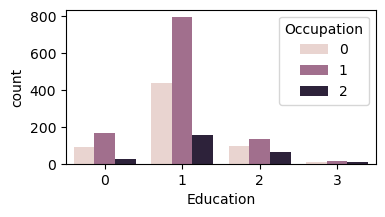

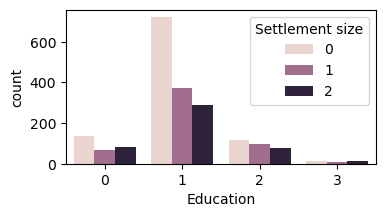

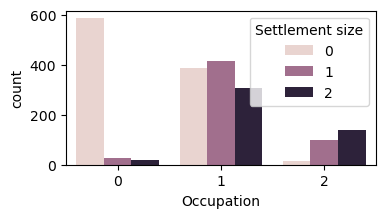

In [30]:
cat_aux = cat_col.copy()

for category1 in cat_col:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(4,2))
            sns.countplot(data=customer_info, x=category1, hue=category2)

### Multivariate Analysis

In [32]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

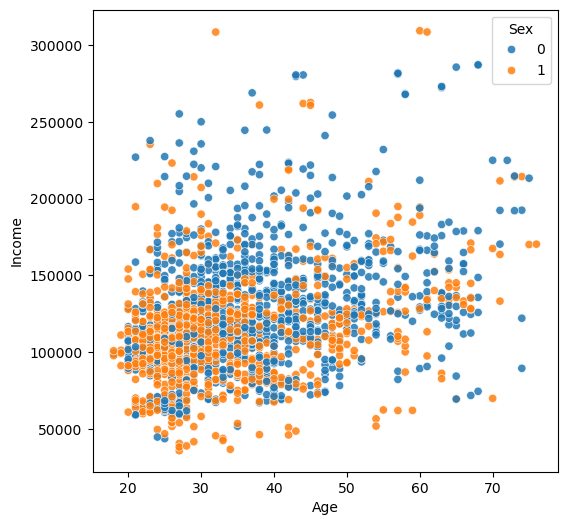

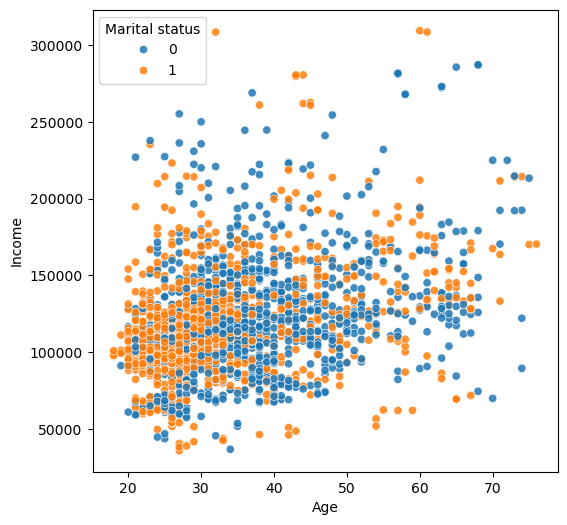

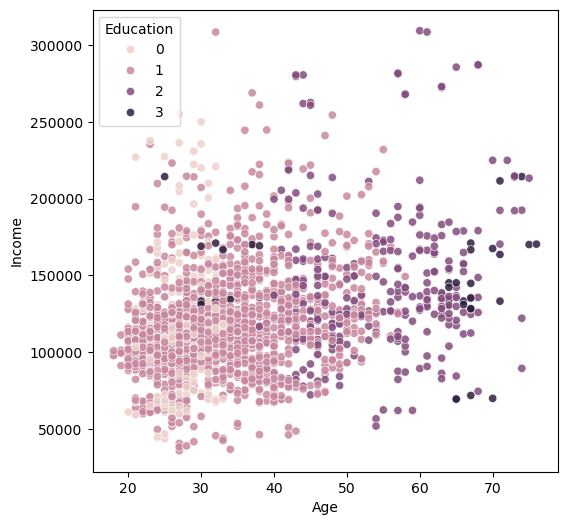

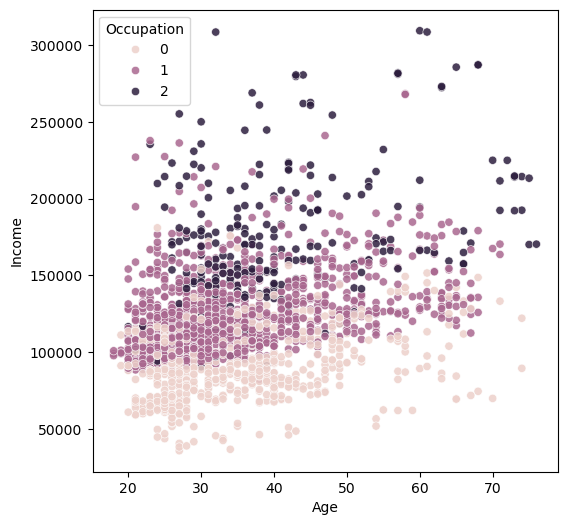

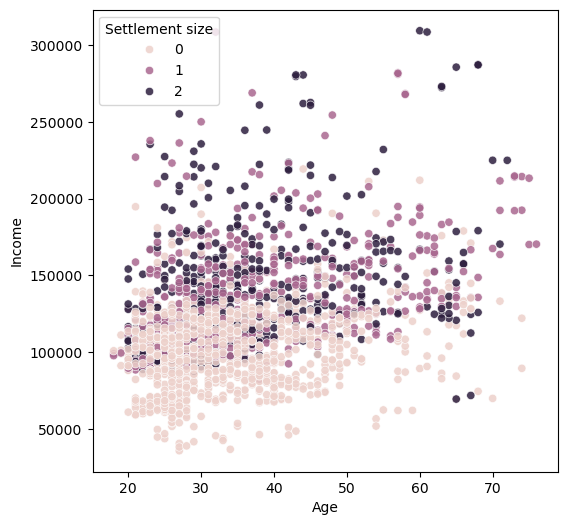

In [33]:
for cat in cat_col:
    bivariate_scatter('Age', 'Income', cat, customer_info)

## Data Pre-processing

Retrieve original data that has a numeric data type

In [36]:
df = customer_info.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


### Scaling

In [38]:
df_cp = df.copy()

In [39]:
scaler = RobustScaler()

X = scaler.fit_transform(df_cp)

In [40]:
X

array([[ 0.        ,  0.        ,  2.26666667, ...,  0.22572942,
         0.        ,  1.        ],
       [ 1.        ,  1.        , -0.73333333, ...,  0.87169937,
         0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.06666667, ..., -0.65179787,
        -1.        , -1.        ],
       ...,
       [ 0.        ,  0.        , -0.13333333, ..., -0.72133683,
        -1.        , -1.        ],
       [ 1.        ,  1.        , -0.6       , ..., -0.43506397,
        -1.        , -1.        ],
       [ 0.        ,  0.        , -0.53333333, ..., -1.1663862 ,
        -1.        , -1.        ]])

In [41]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,0.193933,0.03800,0.133780,-0.189500,-0.261000
std,0.498272,0.500113,0.781293,0.59978,0.943078,0.638587,0.812533
min,0.000000,0.000000,-1.000000,-1.00000,-1.972741,-1.000000,-1.000000
25%,0.000000,0.000000,-0.400000,0.00000,-0.442606,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.600000,0.00000,0.557394,0.000000,0.000000
max,1.000000,1.000000,2.866667,2.00000,4.796345,1.000000,1.000000


## Clustering Model

### Determining the optimal number of clusters with the elbow method

Elbow method, to find how many clusters will be used to divide the dataset.

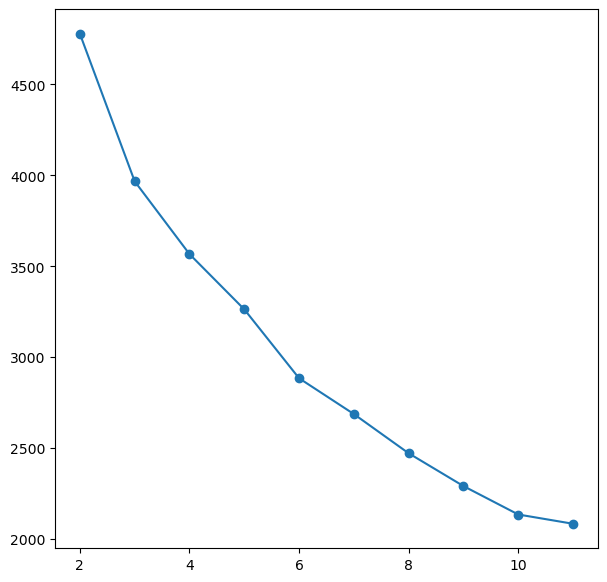

In [45]:
clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
inertia = []

for c in clusters_range:
    kmeans = KMeans(n_clusters = c, random_state = 42).fit(X) # Training clustering into c clusters with Kmeans
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (7, 7))
plt.plot(clusters_range, inertia, marker = 'o')

From the elbow method above, we will roughly divide the customers into 3 or 6 groups

### Determine the number of clusters with the silhouette score method

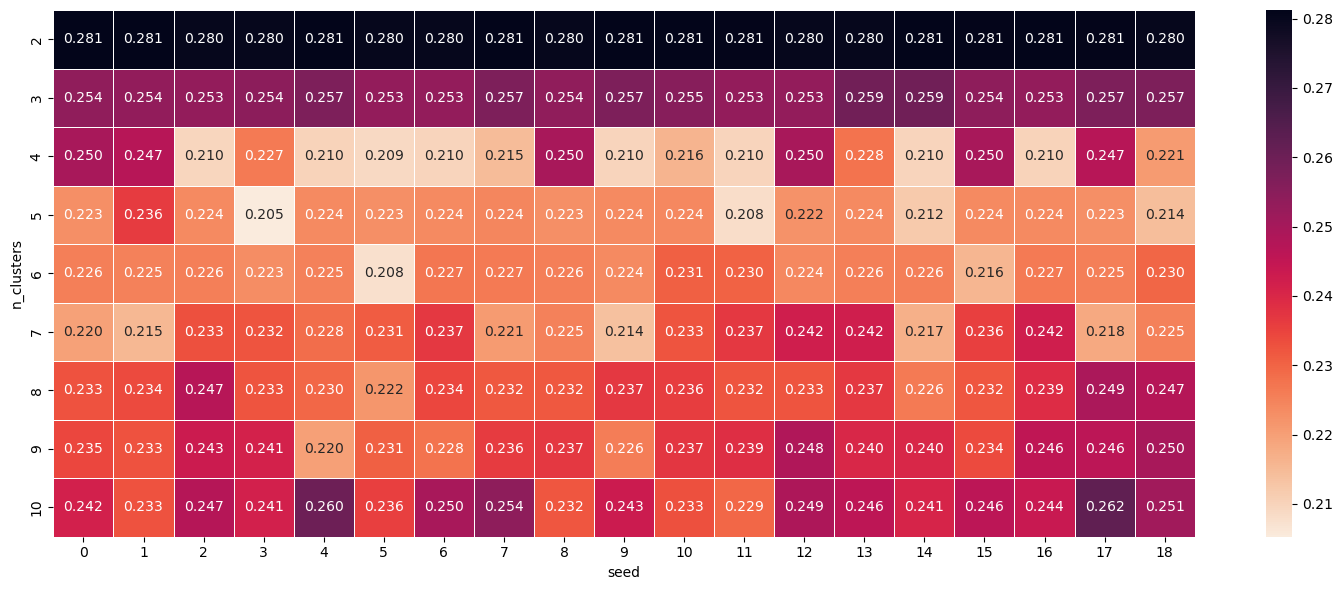

In [48]:
clusters_range=range(2, 11)
random_range  =range(0, 19)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters = c, random_state = r)
        cluster_labels = clusterer.fit_predict(X)
        sillhouette_avg = silhouette_score(X, cluster_labels)
        results.append([c, r, sillhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

From the results of the elbow method and silhouette score, we decided to divide the customer dataset into 3 groups/cluster.

## Run the clustering algorithm to divide the dataset into 3 groups

In [51]:
pd.DataFrame(X, columns = df_cp.columns)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,2.266667,1.0,0.225729,0.0,1.0
1,1.0,1.0,-0.733333,0.0,0.871699,0.0,1.0
2,0.0,0.0,1.066667,0.0,-0.651798,-1.0,-1.0
3,0.0,0.0,0.800000,0.0,1.386238,0.0,0.0
4,0.0,0.0,1.333333,0.0,0.828590,0.0,0.0
...,...,...,...,...,...,...,...
1995,1.0,0.0,0.933333,0.0,0.197394,-1.0,-1.0
1996,1.0,1.0,-0.400000,0.0,0.054332,0.0,-1.0
1997,0.0,0.0,-0.133333,-1.0,-0.721337,-1.0,-1.0
1998,1.0,1.0,-0.600000,0.0,-0.435064,-1.0,-1.0


Dimensionality reduction of our training dataset, from 7 dimensions to 3 dimensions using PCA (Principal Component Analysis) algorithm.

In [53]:
pca = PCA(n_components=3, random_state=42)

X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])
X_pca_df

,X1,X2,X3
0,1.623344,1.385229,-1.124978
1,0.789177,-1.098765,1.017516
2,-0.861404,0.982265,-1.133028
3,1.331467,0.131648,-0.508426
4,1.113729,0.526599,-0.831148
...,...,...,...
1995,-0.444660,0.981596,-0.347724
1996,-0.618765,-0.105803,0.908125
1997,-1.443522,-0.405835,-0.991475
1998,-1.415608,-0.002444,0.706159


Run the KMeans clustering algorithm for our 3-dimensional dataset.

In [159]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_

X_pca_df['Labels'] = labels
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)
X_pca_df

,X1,X2,X3,Labels
0,1.623344,1.385229,-1.124978,0
1,0.789177,-1.098765,1.017516,0
2,-0.861404,0.982265,-1.133028,2
3,1.331467,0.131648,-0.508426,1
4,1.113729,0.526599,-0.831148,0
...,...,...,...,...
1995,-0.444660,0.981596,-0.347724,0
1996,-0.618765,-0.105803,0.908125,0
1997,-1.443522,-0.405835,-0.991475,2
1998,-1.415608,-0.002444,0.706159,2


In [161]:
X_pca_df['Labels'].value_counts()

Labels
0    904
2    871
1    225
Name: count, dtype: int64

## Visualization of clustering results

In [163]:
fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [165]:
results_df = df.copy()

results_df['Labels'] = kmeans.labels_
results_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,0
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,2
1998,1,1,24,1,97968,0,0,2


Describe method provides general statistics about the data

In [330]:
summary = {}

for index in range(3):
   summary[index] = results_df[results_df['Labels'] == index].describe().T

Cluster 0

In [332]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Sex,904.0,0.386062,0.487115,0.0,0.0,0.0,1.00,1.0
Marital status,904.0,0.448009,0.497565,0.0,0.0,0.0,1.00,1.0
Age,904.0,37.748894,11.604597,19.0,29.0,35.0,45.00,74.0
Education,904.0,1.071903,0.612102,0.0,1.0,1.0,1.00,3.0
Income,904.0,131306.526549,14316.724852,110844.0,119591.5,128120.0,141849.75,163940.0
Occupation,904.0,0.991150,0.500198,0.0,1.0,1.0,1.00,2.0
Settlement size,904.0,0.949115,0.799820,0.0,0.0,1.0,2.00,2.0
Labels,904.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


Cluster 1

In [334]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Sex,225.0,0.293333,0.456305,0.0,0.0,0.0,1.0,1.0
Marital status,225.0,0.457778,0.499325,0.0,0.0,0.0,1.0,1.0
Age,225.0,43.875556,14.308856,21.0,31.0,42.0,55.0,76.0
Education,225.0,1.346667,0.770436,0.0,1.0,1.0,2.0,3.0
Income,225.0,197576.120000,34003.172064,164559.0,171565.0,183765.0,214204.0,309364.0
Occupation,225.0,1.577778,0.546453,0.0,1.0,2.0,2.0,2.0
Settlement size,225.0,1.364444,0.661828,0.0,1.0,1.0,2.0,2.0
Labels,225.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Cluster 2

In [336]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Sex,871.0,0.572905,0.494941,0.0,0.0,1.0,1.0,1.0
Marital status,871.0,0.556831,0.497045,0.0,0.0,1.0,1.0,1.0
Age,871.0,31.941447,9.348552,18.0,25.0,29.0,37.0,74.0
Education,871.0,0.923077,0.495782,0.0,1.0,1.0,1.0,3.0
Income,871.0,90416.889782,16222.714196,35832.0,79473.5,94518.0,104068.0,110835.0
Occupation,871.0,0.424799,0.515088,0.0,0.0,0.0,1.0,2.0
Settlement size,871.0,0.359357,0.669981,0.0,0.0,0.0,0.5,2.0
Labels,871.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


Cluster 0: Clusters with average customers of mature age, moderate income, working as skilled employees / officials, and living in mid-sized cities.
<br>
<br>
Cluster 1: Clusters with average customers of old age, high income, working as management / self-employed / highly qualified employee / officer, and living in big cities.
<br>
<br>
Cluster 2: Clusters with average customers of young age, small income, unemployed / unskilled, and living in small cities.

In [338]:
results_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,0
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,2
1998,1,1,24,1,97968,0,0,2


# Classification

In [340]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import pickle

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Exploratory Data Analysis

In [342]:
results_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,0
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,2
1998,1,1,24,1,97968,0,0,2


In [343]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
 7   Labels           2000 non-null   int32
dtypes: int32(1), int64(7)
memory usage: 117.3 KB


In [344]:
results_df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000,0.983500
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533,0.942163
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000,2.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000,2.000000


### Missing Value and Duplicated Value

In [346]:
results_df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
Labels             0
dtype: int64

In [347]:
results_df.duplicated().sum()

0

### Outlier

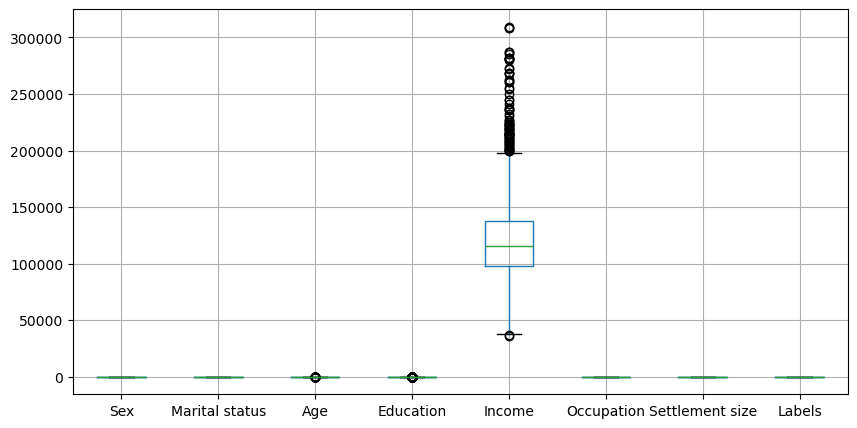

In [349]:
results_df.boxplot(figsize=(10, 5))
plt.show()

### Label Distribution

In [351]:
label = results_df['Labels']

label_counts = label.value_counts().sort_values(ascending=False)
label_counts

Labels
0    904
2    871
1    225
Name: count, dtype: int64

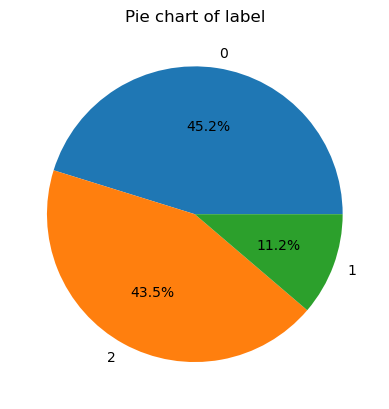

In [352]:
# create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')

# add title
plt.title('Pie chart of label')

# show the plot
plt.show()

### Correlation

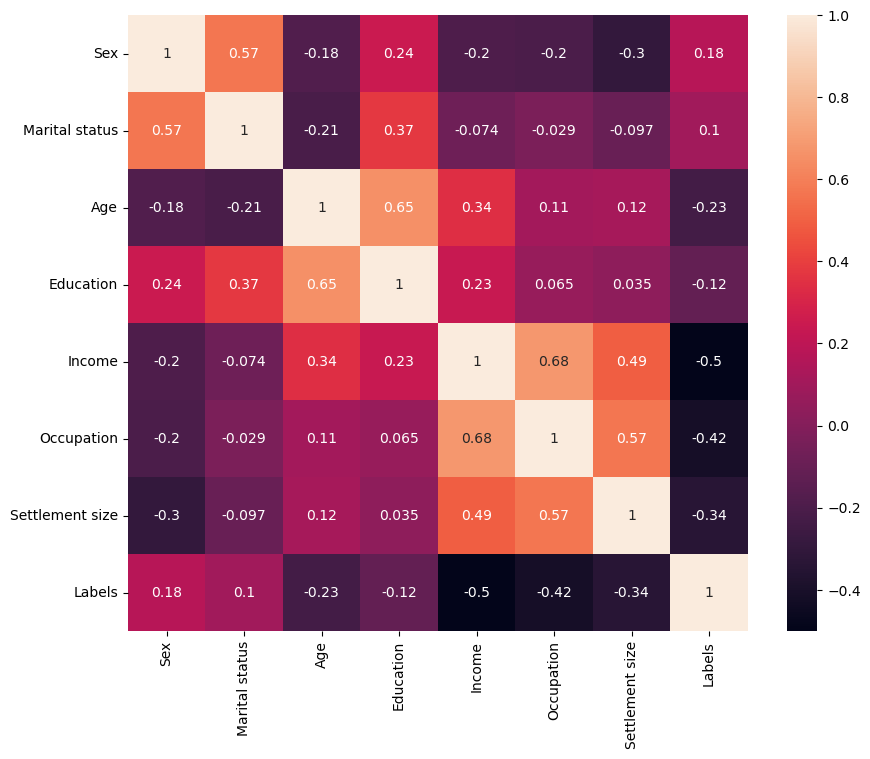

In [354]:
# Select only numerical columns for correlation calculation
numerical_df = results_df.select_dtypes(include=np.number)

# Calculate correlation and plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True);

## Data Pre-processing

In [356]:
results_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,0


In [357]:
df_cp = results_df.copy()

### Split Data

In [359]:
X = df_cp.drop(columns='Labels')
y = df_cp['Labels']

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1600, 7)
(400, 7)
(1600,)
(400,)


### Scalling

In [362]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [363]:
X_train

array([[ 0.        ,  1.        , -0.26666667, ...,  0.94922144,
         0.        ,  1.        ],
       [ 1.        ,  1.        , -0.26666667, ..., -0.41328701,
         0.        , -1.        ],
       [ 0.        ,  1.        , -0.46666667, ..., -0.46917081,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.        , -0.4       , ...,  1.50333757,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  1.26666667, ...,  0.19968237,
        -1.        , -1.        ],
       [ 0.        ,  0.        ,  0.6       , ...,  0.47464723,
         0.        ,  1.        ]])

In [364]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

## Classification Modelling

In [366]:
def classification_eval(actual, predict, name):

  cm = confusion_matrix(actual, predict)
  # plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=['0', '1', '2'],
              yticklabels=['0', '1', '2'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Lables')
  plt.title(f'Confusion Matrix - {name}')
  plt.show()

  print(classification_report(actual, predict))

In [397]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    results.append({'Model': model_name, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test})

df_accuracy = pd.DataFrame(results).sort_values(by=['Train Accuracy', 'Test Accuracy'], ascending=[False, False])
df_accuracy

,Model,Train Accuracy,Test Accuracy
2,Decision Tree,1.000000,1.0000
3,Random Forest,1.000000,1.0000
0,Logistic Regression,0.984375,0.9925
4,Support Vector Machine,0.978750,0.9750
1,K-NN,0.959375,0.9200


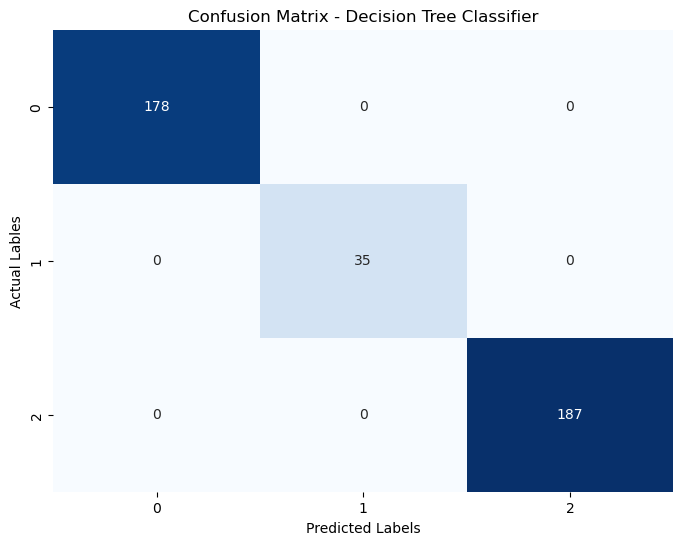

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00       187

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [368]:
lr = DecisionTreeClassifier()

model = lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

classification_eval(y_test, y_pred_test, 'Decision Tree Classifier')

In [369]:
pickle.dump(model, open('model_dt.pkl', 'wb'))